In [23]:
# coding: utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
plt.rcParams['font.sans-serif'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False   
import warnings
warnings.filterwarnings("ignore")

In [24]:
# 导入训练集和测试集数据
data1 = pd.read_excel('训练集.xlsx',engine='openpyxl')
data2 = pd.read_excel('测试集.xlsx',engine='openpyxl')
print(data1)
print(data2)


    性别  age  CA199    CEA    AFP    PLT   WBC  APTT   TT   FIB    D2     TP  \
0    男   61  93.52   2.79   1.10  223.0  7.41  33.5  18.6  2.0  0.08  65.17   
1    女   67   7.24  13.11   1.10  264.0  5.11  35.8  13.8  2.9  0.36  64.55   
2    男   66  87.81  17.43   2.78  340.0  5.34  30.0  14.4  3.0  0.24  69.33   
3    男   34   8.97  31.73   3.17  279.0  7.61  29.8  14.4  2.9  0.22  77.53   
4    男   65   5.10   6.10   3.20  209.0  6.00  32.8  15.8  2.8  0.15  58.14   
..  ..  ...    ...    ...    ...    ...   ...   ...   ...  ...   ...    ...   
290  男   59   4.67   1.22  11.73  201.0  5.78  31.2  15.7  2.6  0.26  68.48   
291  男   38   3.12   2.89   4.07  372.0  4.07  30.4  14.6  4.2  0.72  77.01   
292  男   71   2.79   9.82   7.81   96.0  5.07  27.2  16.3  2.4  0.99  72.28   
293  男   59   1.15   1.33   2.35  504.0  5.89  38.2  15.5  4.2  1.33  69.52   
294  男   14  18.22   1.22   1.33  274.0  4.86  29.9  17.4  2.4  0.40  62.51   

       Alb    Glb   IBIL    AST      UA   BUN 是否结直肠

In [25]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性别      295 non-null    object 
 1   age     295 non-null    int64  
 2   CA199   295 non-null    float64
 3   CEA     295 non-null    float64
 4   AFP     295 non-null    float64
 5   PLT     295 non-null    float64
 6   WBC     295 non-null    float64
 7   APTT    295 non-null    float64
 8   TT      295 non-null    float64
 9   FIB     295 non-null    float64
 10  D2      295 non-null    float64
 11  TP      295 non-null    float64
 12  Alb     295 non-null    float64
 13  Glb     295 non-null    float64
 14  IBIL    295 non-null    float64
 15  AST     295 non-null    float64
 16  UA      295 non-null    float64
 17  BUN     295 non-null    float64
 18  是否结直肠癌  295 non-null    object 
dtypes: float64(16), int64(1), object(2)
memory usage: 43.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 

              age        CA199         CEA         AFP         PLT  \
count  295.000000   295.000000  295.000000  295.000000  295.000000   
mean    58.044068    37.914068   10.001458    3.305559  272.317627   
std     14.063562   166.052459   24.230763    3.766615   98.750089   
min     14.000000     1.000000    0.550000    0.390000   14.700000   
25%     50.000000     3.510000    1.855000    2.000000  210.500000   
50%     59.000000     8.450000    3.430000    2.750000  255.000000   
75%     67.000000    16.255000    6.850000    3.700000  315.500000   
max     89.000000  2029.430000  251.120000   58.600000  678.000000   

              WBC        APTT         TT          FIB          D2          TP  \
count  295.000000  295.000000  295.000000  295.000000  295.000000  295.000000   
mean     6.794373   30.795864   14.608746    3.557085    0.661153   67.479119   
std      2.299154    3.875480    2.261956    1.062883    0.842351    6.509156   
min      1.500000    1.330000   11.100000    

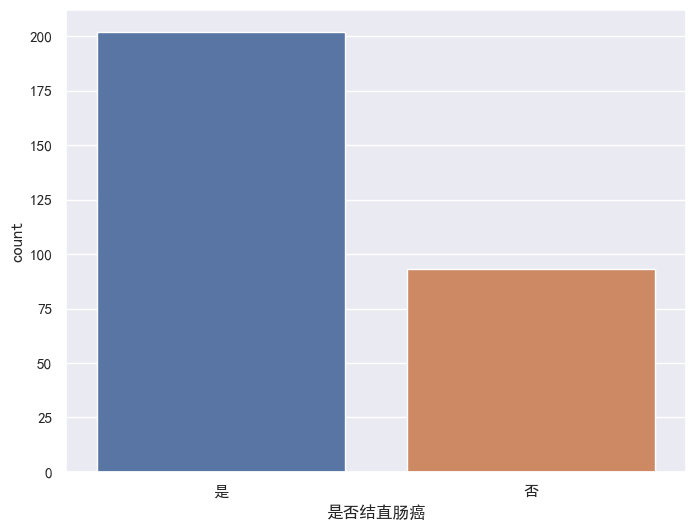

In [26]:
#  训练集的描述性统计

data1.select_dtypes('object').describe()
#  是否发病的直方图
fig,axes = plt.subplots(figsize = (8,6))
sns.countplot(x = '是否结直肠癌',data = data1)
print(data1.describe())
data1['是否结直肠癌'] = data1['是否结直肠癌'].replace("是",1).replace("否",0)
data1['是否结直肠癌'] = data1['是否结直肠癌'].astype('int64')

              age       CA199         CEA         AFP         PLT         WBC  \
count  192.000000  192.000000  192.000000  192.000000  192.000000  192.000000   
mean    56.578125   15.139792    5.185677    5.577708  248.088542    6.496302   
std     15.055713   29.965206    7.376873   26.126311   99.065357    2.511183   
min     14.000000    0.860000    0.510000    0.550000   66.000000    2.040000   
25%     49.000000    2.650000    1.437500    1.870000  189.750000    4.785000   
50%     57.000000    6.285000    2.815000    2.610000  234.500000    5.950000   
75%     68.000000   14.895000    5.160000    3.985000  293.250000    7.345000   
max     87.000000  279.810000   68.270000  340.480000  645.000000   18.850000   

             APTT         TT          FIB          D2          TP         Alb  \
count  192.000000  192.000000  192.000000  192.000000  192.000000  192.000000   
mean    35.450521   18.273958    3.589948    0.697969   68.895573   41.373958   
std      5.959945    1.4939

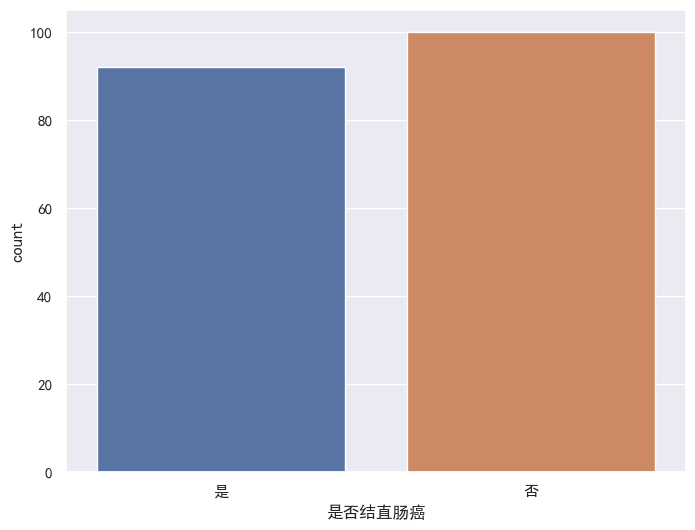

In [27]:
#  测试集的描述性统计

data2.select_dtypes('object').describe()
#  是否发病的直方图
fig,axes = plt.subplots(figsize = (8,6))
sns.countplot(x = '是否结直肠癌',data = data2)
print(data2.describe())
data2['是否结直肠癌'] = data2['是否结直肠癌'].replace("是",1).replace("否",0)
data2['是否结直肠癌'] = data2['是否结直肠癌'].astype('int64')

In [28]:
data1['属性'] = '训练集'
data2['属性'] = '测试集'
data =pd.concat([data1,data2],axis=0)

# 数据类型转换
dummies_性别 =pd.get_dummies(data['性别'],prefix='性别')
data_new =pd.concat([data, dummies_性别],axis=1)
data_new.drop(['性别']  ,axis=1,inplace=True)

In [29]:
data_new1 = data_new[data_new['属性']== "训练集"]
data_new1 = data_new1.drop(['属性'],axis=1)
data_new2 = data_new[data_new['属性']== "测试集"]
data_new2 = data_new2.drop(['属性'],axis=1)
data_new1.info()
data_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 294
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     295 non-null    int64  
 1   CA199   295 non-null    float64
 2   CEA     295 non-null    float64
 3   AFP     295 non-null    float64
 4   PLT     295 non-null    float64
 5   WBC     295 non-null    float64
 6   APTT    295 non-null    float64
 7   TT      295 non-null    float64
 8   FIB     295 non-null    float64
 9   D2      295 non-null    float64
 10  TP      295 non-null    float64
 11  Alb     295 non-null    float64
 12  Glb     295 non-null    float64
 13  IBIL    295 non-null    float64
 14  AST     295 non-null    float64
 15  UA      295 non-null    float64
 16  BUN     295 non-null    float64
 17  是否结直肠癌  295 non-null    int64  
 18  性别_女    295 non-null    bool   
 19  性别_男    295 non-null    bool   
dtypes: bool(2), float64(16), int64(2)
memory usage: 44.4 KB
<class 'pandas.core.frame

In [30]:
#  特征和标签划分；
x_train = data_new1.drop(['是否结直肠癌'],axis=1)
y_train = data_new1['是否结直肠癌']

x_test = data_new2.drop(['是否结直肠癌'],axis=1)
y_test = data_new2['是否结直肠癌']

In [31]:
# 归一化处理
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# x_train = ss.fit_transform(x_train)
# x_test = ss.transform(x_test)

In [32]:

#### 随机森林建模 #####
from sklearn.ensemble import  RandomForestClassifier
RFmodel = RandomForestClassifier(max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=10, n_estimators=100)

RFmodel.fit(x_train,y_train)
train_RFpred = RFmodel.predict(x_train)
test_RFpred = RFmodel.predict(x_test)


In [33]:
# 混淆矩阵
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc
print('RF_train\nconfusion_matrix\n',confusion_matrix(y_true=y_train, y_pred= train_RFpred ))
print('classification report\n',classification_report(y_true=y_train, y_pred= train_RFpred))
print('RF_test\nconfusion_matrix\n', confusion_matrix(y_true=y_test, y_pred= test_RFpred ))
print('classification report\n',classification_report(y_true=y_test, y_pred= test_RFpred ))

RF_train
confusion_matrix
 [[ 84   9]
 [  3 199]]
classification report
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        93
           1       0.96      0.99      0.97       202

    accuracy                           0.96       295
   macro avg       0.96      0.94      0.95       295
weighted avg       0.96      0.96      0.96       295

RF_test
confusion_matrix
 [[63 37]
 [15 77]]
classification report
               precision    recall  f1-score   support

           0       0.81      0.63      0.71       100
           1       0.68      0.84      0.75        92

    accuracy                           0.73       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.74      0.73      0.73       192



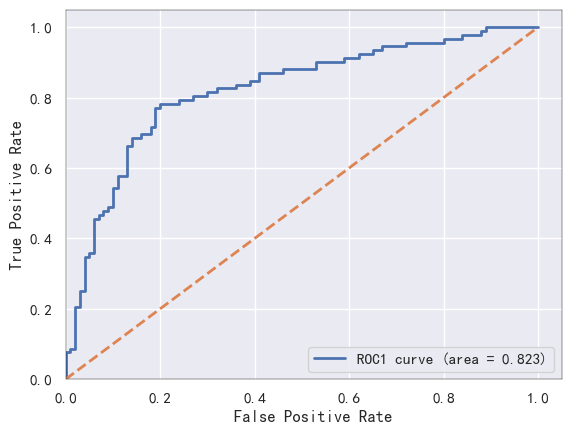

In [35]:

# 测试集拟合的ROC曲线
y_predRFprob1 = RFmodel.predict_proba(x_test)[:, 1]
fpr1, tpr1, threshold1 = roc_curve(y_test, y_predRFprob1)
RFroc_auc = auc(fpr1, tpr1)


plt.plot(fpr1, tpr1, linewidth=2, label='ROC1 curve (area = %0.3f)' % RFroc_auc)  
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.ylim(0, 1.05) 
plt.xlim(0, 1.05)  
plt.legend(loc=4)  
plt.rcParams['axes.facecolor'] = 'white'
for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0.3)  
plt.show()


In [37]:
# 对测试集数据进行预测
yf_pred_RFproba = RFmodel.predict_proba(x_test)[:, 1]

# 将预测结果添加到DataFrame中
data2['是患者的概率_RF'] = yf_pred_RFproba



# 将DataFrame保存为Excel文件
data2.to_excel('../测试集预测结果.xlsx', index=False)
